# Análise de Dados do AIRBNB - RIO DE JANEIRO


O Airbnb (Android | iOS | Web) é uma plataforma de hospedagem, que oferece outras opções além de hotéis, albergues e hostels para viajantes do mundo inteiro, sendo uma alternativa mais barata em relação a acomodações mais tradicionais.

**Neste Notebook iremos análisar os dados referentes á cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir dos dados brutos.**


**Obtenção dos dados**

Os dados podem ser obtidos a partir do site [Inside airbnb](https://insideairbnb.com/get-the-data)
Para a análise usaremos apenas o dado:


*   **Listings.csv** - Um sumário resumido com informações e métricas das cidades do Rio de Janeiro. 


In [2]:
##Importando as bibliotecas necessárias
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-12-24/visualisations/listings.csv')

In [4]:
#Visualizando os dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN


**Análise dos dados**
Nesta etapa do processo vamos análisar o que cada coluna representa, e quais dados elas possuem, algumas colunas como por exemplo: license e neighbourhood_group, não apresentam valores válidos e por isso não serão levadas para a análise. As demais colunas: 

     Name          = Nome do Hotel 
     Host_name     = Nome do Anfitrião
     Host_id       = Num. gerado ao anfirtrião
     Neighbourhood = Nome do bairro
     Latitude      = Coordenada da Latidade
     Longitude     = Coordenada de longetude
     RoomType      = Tipo de quarto
     Price         = Preço 
     Minimum_nights= Minimo de noites
     number_of_reviews = Numero de reviws que a propriedade possui
     last_reviews  = Data do ultimo review
     reviews_per_month	= Quantidade de reviw por mes
     calculated_host_listings_count = Quantidade de imóveis do mesmo anfitriao
     availability_365	= NUmero de dias disponiveis em 365 dias
     

In [5]:
#df['neighbourhood'].unique()

**Q1 - QUANTOS ATRIBUTOS ( VÁRIAVEIS ) E QUANTAS ENTRADAS O NOSSO CONJUNTO DE DADOS POSSUI? QUAIS SÃO OS TIPOS DESSAS VÁRIAVEIS?**

In [6]:
#Identificando o volume do Dataset
print('Entradas:\t {}'.format(df.shape[0]))
print('Váriaveis:\t {}'.format(df.shape[1]))
print(' ')
print(' ')
print(' ')
print("Tipo de dados: ")
#Verificando os tipos das váriaveis
display(df.dtypes)

Entradas:	 24549
Váriaveis:	 18
 
 
 
Tipo de dados: 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Q2 - QUAIS AS PORCENTAGENS DE VALORES AUSENTES?**

A QUALIDADE DE UM *DATASET* ESTÁ DIRETAMENTE RELACIONADA A QUANTIDADE DE VALORES AUSENTES, É IMPORTANTE ENTENDER LOGO NO ÍNICIO DA ANÁLISE QUAIS VALORES ESTÃO AUSENTES E SE ESSES VALORES SÃO SIGNIFICATIVOS COMPARADOS AO TOTAL DE ENTRADAS.

In [7]:
#VERIFICANDO E ORDENANDO OS VALORES AUSENTES
#Para saber a quantidade de valores ausentes, pegamos a quantidade de valores ausentes : df.isnull().sum e dividimos
#...pela quantidade de variaveis: df.shape[0]

(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.365025
last_review                       0.365025
name                              0.000855
host_name                         0.000611
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

**Com base na linha acima podemos verificar que: license, neighbourhood_group possuem 100% dos seus valores ausentes, e reviews_per_month , last_review possuem um valor significativo de valores ausentes.**

**Q3 - QUAL TIPO DE DISTRIBUIÇÃO DAS VÁRIAVEIS?**
PARA IDENTIFICAR A DISTRIBUIÇÃO DAS VARIÁVEIS, PODEMOS PLOTAR UM HISTOGRAMA: 

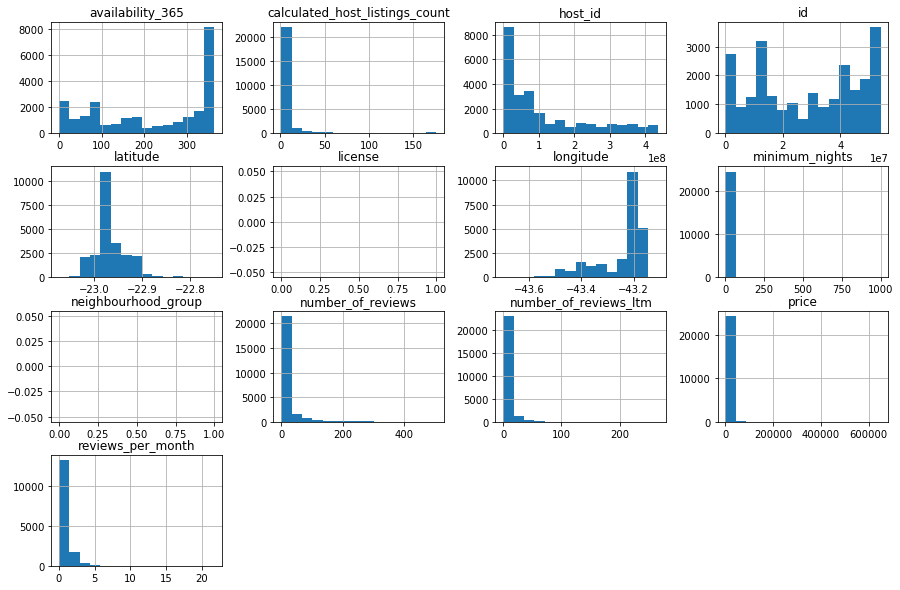

In [8]:
#plotar o histógrama das váriaveis númericas:

df.hist(bins=15, figsize =(15,10));


#Colocamos o ; no final para que não apareça informações desnecessárias do array

**Q4 - EXISTEM OUTLIERS PRESENTES?**
ANÁLISANDO O HISTOGRAMA PODEMOS PERCEBER QUE EXISTEM VÁLORES QUE FOGEM UM POUCO DO PADRÃO, COMO POR EXEMPLO PRICE, MOSTRA APENAS VALORES APRÓXIMADOS DE 20.000 OU MINIMO DE NOITES. 

OUTLIERS SÃO VALORES ATÍPICOS POREM QUE PODEM DEIXAR OS DADOS DESEQUILIBRADOS EM DESARMONIA COM O RESTANTE DOS DADOS. 

PARA CONFIRMAR A PRESENÇA DE OUTLIERS PODEMOS UTILIZAR O METÓDO **.DESCRIBE()**, QUE NOS MOSTRA UM RESUMO ESTATÍTISCO DOS DADOS. 


In [9]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24549.000000,24549.000000,24549.000000,15588.000000,24549.000000,24549.000000
mean,1029.592285,5.092142,14.506416,0.691929,7.066642,218.954907
std,5403.742297,21.211509,34.054009,0.935476,20.046954,133.727245
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,250.000000,2.000000,0.000000,0.090000,1.000000,86.000000
50%,479.000000,3.000000,2.000000,0.310000,1.000000,257.000000
75%,900.000000,4.000000,12.000000,0.962500,4.000000,355.000000
max,650476.000000,1000.000000,504.000000,21.790000,176.000000,365.000000


Aqui podemos afirmar algumas hipóteses, por exemplo:

* A váriavel price, possui 75% dos seus valores com 900,00 porém temos também o valor máximo de 650.476 e a quantidade minimum_nights está acima da quantidade real de 365 dias, possuindo 75% do seu valor em 4 dias, porém com um valor máximo de 1000 dias. 

**PARA CONFIRMAR A PRESENÇA DE OUTLIERS PODEMOS TAMBÉM UTILIZAR O BOXPLOT PARA VERIFICAR VALORES QUE FOGEM DO PADRÃO:**

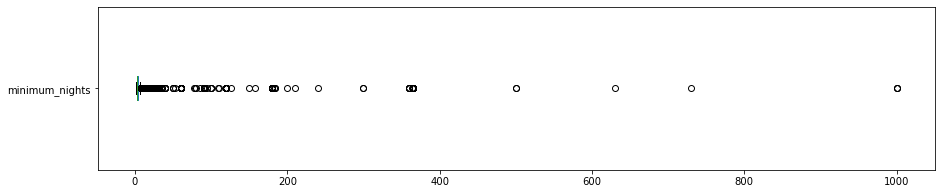

minimum_nights: valores acima de 30:
250 entradas
Porcentagem de valores acima de 30 dias: 1.0184%


In [10]:
df.minimum_nights.plot(kind='box', vert=False,figsize=(15,3))
plt.show()

print("minimum_nights: valores acima de 30:")
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('Porcentagem de valores acima de 30 dias: {:.4f}%'.format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

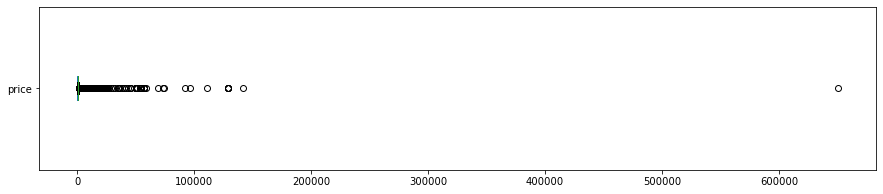

minimum_nights: valores acima de 30:
2877 entradas
Porcentagem de valores acima de 1500: 11.7194%


In [11]:
df.price.plot(kind='box', vert=False,figsize=(15,3))
plt.show()

print("minimum_nights: valores acima de 30:")
print('{} entradas'.format(len(df[df.price> 1500])))
print('Porcentagem de valores acima de 1500: {:.4f}%'.format((len(df[df.price > 1500])/df.shape[0])*100))

**HISTÓGRAMA SEM OUTLIERS**
AGORA QUE IDENTIFICAMOS OUTLIERS NAS VARIÁVEIS PRICE E MINIMUM_NIGHTS, VAMOS LIMPAR O DATAFRAME E PLOTAR NOVAMENTE O HISTÓGRAMA.

In [12]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price>1500].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights >30].index, axis = 0, inplace=True)

#Eliminando as váriaveis neighbourhood_group  e license  pois estão vazias 
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)


In [13]:
#Apenas verificando se os valores realmente não estão mais nos dados. 

print('{} entradas'.format(len(df_clean[df_clean.price> 1500])))

print('{} entradas'.format(len(df_clean[df_clean.minimum_nights > 30])))

0 entradas
0 entradas


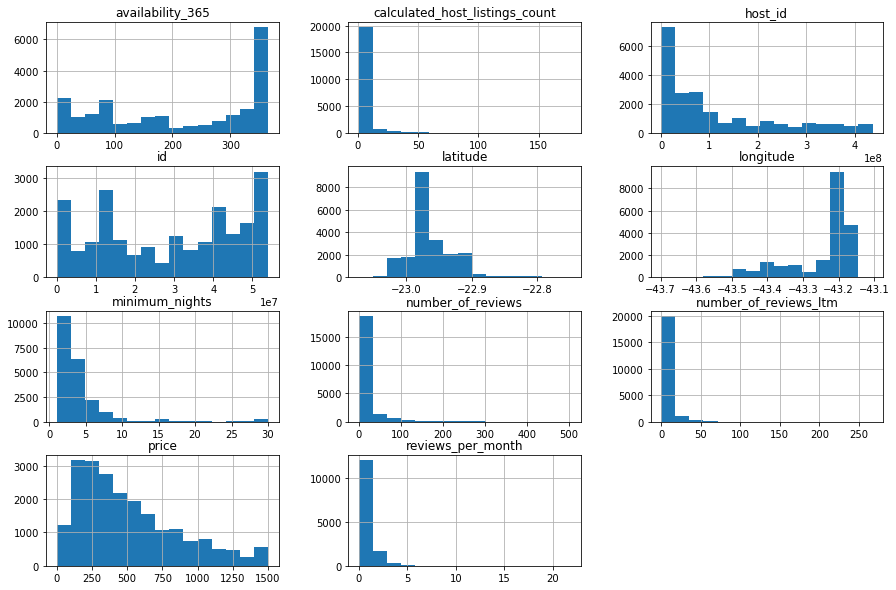

In [14]:
#Plotando o HISTOGRAMA: 

df_clean.hist(bins=15, figsize =(15,10));

**Q4 - QUAL A CORRELAÇÃO EXISTE ENTRE AS VÁRIAVEIS?**

CORRELAÇÃO SIGNIFICA QUE EXISTE UMA RELAÇÃO ENTRE AS DUAS COISAS, NESTE CONTEXTO ESTAMOS BUSCANDO RELAÇÃO OU SEMELHANÇA ENTRE DUAS VÁRIAVEIS. 
ESSA RELAÇÃO PODE SER MEDIDA, E É FUNÇÃO DO COEFICIENTE DE CORRELAÇÃO ESTABELECER QUAL A DENSIDADE DELA. PARA IDENTIFICAR AS CORRELAÇÕES EXISTENTES ENTRE AS VARIÁVEIS DE INTERESSE, VAMOS:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn


In [15]:
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
#O comando .corr() nos mostra a correlação entre os dados. Positivo existe correlação e negativo não existe. 
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.070219,-0.032354,0.024264,0.166961,0.041399
minimum_nights,0.070219,1.000000,-0.075530,-0.131720,-0.053921,-0.002502
number_of_reviews,-0.032354,-0.075530,1.000000,0.566121,-0.033426,-0.138499
reviews_per_month,0.024264,-0.131720,0.566121,1.000000,0.022643,-0.138782
calculated_host_listings_count,0.166961,-0.053921,-0.033426,0.022643,1.000000,0.004623
availability_365,0.041399,-0.002502,-0.138499,-0.138782,0.004623,1.000000


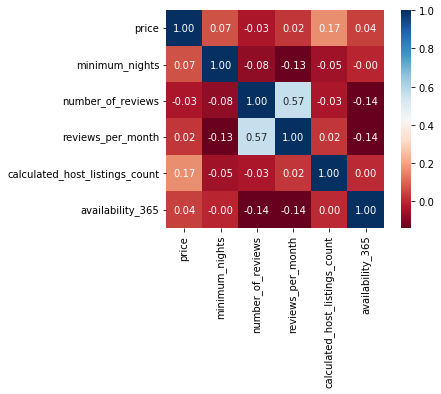

In [17]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f',square=True, linecolor='white',annot=True);

**Verificando os tipos de quartos dispóniveis no AIRBNB**

In [18]:
df_clean.room_type.value_counts()

Entire home/apt    15724
Private room        5197
Shared room          478
Hotel room            67
Name: room_type, dtype: int64

**Mostrando a porcentagem de cada tipo de imóvel**

In [26]:
df_clean.room_type.value_counts()/df_clean.shape[0]

Entire home/apt    0.732507
Private room       0.242104
Shared room        0.022268
Hotel room         0.003121
Name: room_type, dtype: float64

**Q5 - QUAIS AS LOCALIDADES MAIS CARAS?**

UMA MANEIRA DE VERIFICAR UMA VARIAVEL EM FUNÇÃO DE OUTRA É UTILIZANDO O GROUPBY().

QUEREMOS COMPARAR OS BAIRROS QUE ESTÃO NA COLUNA: 'neighbourhood'A PARTIR DO SEU PREÇO DE LOCAÇÃO. 

In [29]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Caju                 1284.000000
Grumari              1079.333333
Vaz Lobo              859.500000
Leblon                729.356360
Manguinhos            684.500000
Ipanema               683.845478
Lagoa                 677.349112
Rocha Miranda         660.500000
Pavuna                636.333333
Alto da Boa Vista     611.761905
Name: price, dtype: float64

**Como no Dataframe são fornecidas as Latitudes e longitudes podemos plotar cada ponto do gráfico, considerando x = Longitude e y = Latitude.**

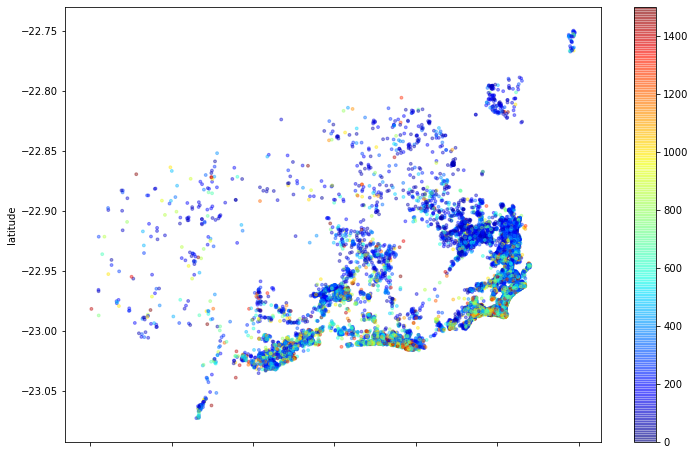

In [31]:
df_clean.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,c=df_clean['price'], s=8,
                cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

   Foi feita uma analise superficial na base de dados do AIRBNB, porém conseguimos perceber que existem outliers em algumas váriaveis. Podemos notas que algumas localidades possuem poucos imóveis dispóniveis, o que pode distorcer algumas informações estatísticas em alguns atributos. 
    
   Por fim, lembramos que o dataset utilizado é uma versão resumida, ideia apenas para uma abordagem inicial desses dados. 